### Dataset

Download the bee/wasp classification dataset using the terminal code below 

!wget https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip

!unzip data.zip

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img

import warnings
warnings.filterwarnings('ignore')

2023-11-12 06:54:57.032658: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

### Convolutional Neural Networks

In [4]:
def make_model(input_size=150, lr=0.002, mo=0.8):  
    model = keras.models.Sequential([
        keras.layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        activation='relu',
        input_shape = (input_size, input_size, 3)
    ),
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    
    optimizer = keras.optimizers.SGD(
        learning_rate = lr, 
        momentum=mo
    )

    loss = keras.losses.BinaryCrossentropy()
    
    model.compile(
        optimizer = optimizer, 
        loss = loss, 
        metrics =['accuracy'])
    
    return model

Q1. Since, we have a binary classification problem, we can use __binary crossentropy__ as the loss function

In [5]:
model = make_model()

2023-11-12 06:54:58.832569: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-12 06:54:58.848648: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-12 06:54:58.849257: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-12 06:54:58.850209: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
____________________________________________

Q2. There are __896__ parameters in the convolutional layer.

### Generators and Training

In [7]:
train_gen = ImageDataGenerator(rescale=1./255)

train_ds = train_gen.flow_from_directory(
    'data/train',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

test_gen = ImageDataGenerator(rescale=1./255)

test_ds = test_gen.flow_from_directory(
    'data/test',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [8]:
history = model.fit(
    train_ds, 
    epochs=10,
    validation_data=test_ds
)

Epoch 1/10


2023-11-12 06:55:01.043420: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-11-12 06:55:01.825150: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-12 06:55:01.825964: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-12 06:55:01.825999: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-11-12 06:55:01.826797: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-12 06:55:01.826864: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


184/184 [==============================] - 11s 48ms/step - loss: 0.6834 - accuracy: 0.5439 - val_loss: 0.6398 - val_accuracy: 0.6307
Epoch 2/10
184/184 [==============================] - 9s 46ms/step - loss: 0.6474 - accuracy: 0.6212 - val_loss: 0.6094 - val_accuracy: 0.6590
Epoch 3/10
184/184 [==============================] - 9s 46ms/step - loss: 0.6028 - accuracy: 0.6701 - val_loss: 0.5636 - val_accuracy: 0.7059
Epoch 4/10
184/184 [==============================] - 8s 46ms/step - loss: 0.5452 - accuracy: 0.7340 - val_loss: 0.5660 - val_accuracy: 0.7092
Epoch 5/10
184/184 [==============================] - 9s 48ms/step - loss: 0.5188 - accuracy: 0.7541 - val_loss: 0.5290 - val_accuracy: 0.7386
Epoch 6/10
184/184 [==============================] - 8s 45ms/step - loss: 0.4935 - accuracy: 0.7664 - val_loss: 0.6261 - val_accuracy: 0.6819
Epoch 7/10
184/184 [==============================] - 8s 46ms/step - loss: 0.4721 - accuracy: 0.7849 - val_loss: 0.5087 - val_accuracy: 0.7538
Epoch 8/1

In [12]:
accuracy = np.array(history.history['accuracy'])

In [23]:
round(np.median(accuracy), 2)

0.76

Q3. The median of training accuracy is __0.76__. Option D. 0.80

In [25]:
round(np.std(history.history['loss']), 3)

0.094

Q4. The standard deviation of training loss is __0.094__. Option C. 0.091

### Data Augmentation

In [17]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_ds = train_gen.flow_from_directory(
    'data/train',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

test_gen = ImageDataGenerator(rescale=1./255)

test_ds = test_gen.flow_from_directory(
    'data/test',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [18]:
augmented_history = model.fit(
    train_ds, 
    epochs=10,
    validation_data=test_ds
)

Epoch 1/10
184/184 [==============================] - 24s 130ms/step - loss: 0.4993 - accuracy: 0.7604 - val_loss: 0.5361 - val_accuracy: 0.7353
Epoch 2/10
184/184 [==============================] - 24s 130ms/step - loss: 0.4941 - accuracy: 0.7696 - val_loss: 0.4714 - val_accuracy: 0.7876
Epoch 3/10
184/184 [==============================] - 24s 129ms/step - loss: 0.4798 - accuracy: 0.7797 - val_loss: 0.4806 - val_accuracy: 0.7767
Epoch 4/10
184/184 [==============================] - 24s 130ms/step - loss: 0.4740 - accuracy: 0.7781 - val_loss: 0.4589 - val_accuracy: 0.7778
Epoch 5/10
184/184 [==============================] - 24s 129ms/step - loss: 0.4765 - accuracy: 0.7778 - val_loss: 0.4760 - val_accuracy: 0.7865
Epoch 6/10
184/184 [==============================] - 24s 131ms/step - loss: 0.4713 - accuracy: 0.7792 - val_loss: 0.4651 - val_accuracy: 0.7756
Epoch 7/10
184/184 [==============================] - 24s 130ms/step - loss: 0.4610 - accuracy: 0.7911 - val_loss: 0.4917 - val_ac

In [22]:
round(np.mean(augmented_history.history['val_loss']), 2)

0.48

Q5. The mean of test loss with augmentation is __0.48__. Option B. 0.48

In [21]:
round(np.mean(augmented_history.history['val_accuracy'][6:]), 2)

0.78

Q6. The average of test accuracy for last 5 epochs with augmentation is __0.78__. Option C. 0.78

### Using the model

In [26]:
path = ('data/test/wasp/10060338395_bac28dcb97_n.jpg')

In [27]:
img = load_img(path, target_size=(150,150))

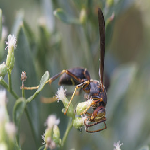

In [28]:
img

In [29]:
x = np.array(img)
X = np.array([x])

In [30]:
pred = model.predict(X)

1/1 [==============================] - 0s 101ms/step


In [35]:
pred[0]

array([1.], dtype=float32)

In [33]:
train_ds.class_indices

{'bee': 0, 'wasp': 1}